<a href="https://colab.research.google.com/github/SaiSowmi-12/ADS1/blob/main/Copy_of_Applied_DataScience2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df=pd.read_csv("supermarket_sales.csv")

In [83]:
print(df)

      Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle       46.33         7  16.2155  

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [85]:
df.dtypes

,0
Invoice ID,object
Branch,object
City,object
Customer type,object
Gender,object
Product line,object
Unit price,float64
Quantity,int64
Tax 5%,float64
Total,float64


In [86]:
df.shape

(1000, 17)

In [87]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [88]:
df.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


In [89]:
df.duplicated().sum()

np.int64(0)

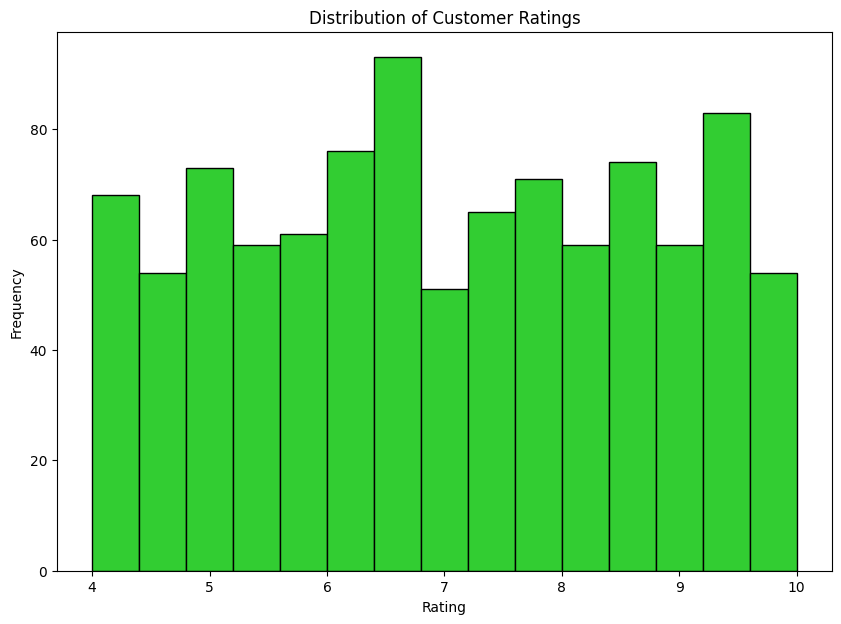

In [90]:
plt.figure(figsize=(10,7))
plt.hist(df['Rating'], bins=15, edgecolor='black', color='limegreen')
plt.title("Distribution of Customer Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

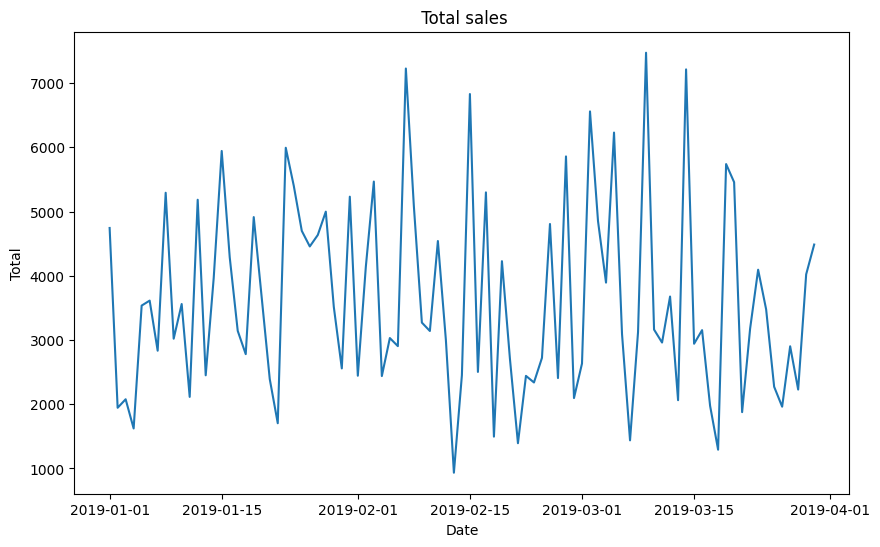

In [92]:
plt.figure(figsize=(10,6))
df["Date"] = pd.to_datetime(df["Date"])
total_sales = df.groupby('Date')['Total'].sum().reset_index()
sns.lineplot(x='Date',y='Total',data=total_sales)
plt.title(" Total sales")
plt.xlabel("Date")
plt.ylabel("Total")
plt.show()

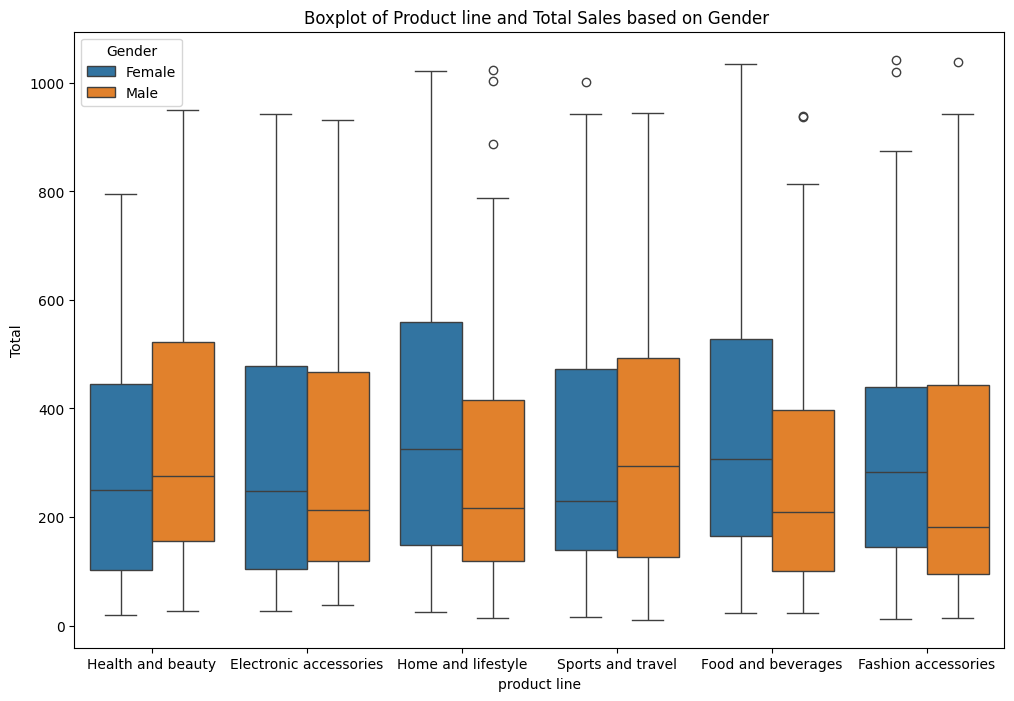

In [93]:
plt.figure(figsize=(12, 8))
sns.boxplot(x = df["Product line"], y = df["Total"],hue='Gender',data=df)
plt.title("Boxplot of Product line and Total Sales based on Gender ")
plt.xlabel("product line")
plt.ylabel("Total")
plt.show()

Clustering

In [94]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [95]:
df1 = pd.read_csv('supermarket_sales.csv', usecols=['gross income','Rating'])

In [96]:
df1.dropna(inplace=True)

In [45]:
print(df1)

     gross income  Rating
0         26.1415     9.1
1          3.8200     9.6
2         16.2155     7.4
3         23.2880     8.4
4         30.2085     5.3
..            ...     ...
995        2.0175     6.2
996       48.6900     4.4
997        1.5920     7.7
998        3.2910     4.1
999       30.9190     6.6

[1000 rows x 2 columns]


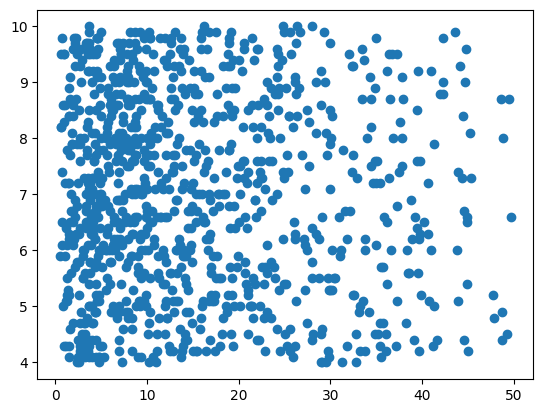

In [97]:
plt.scatter(df1['gross income'],df1['Rating'])

In [98]:
scaler = MinMaxScaler()
scaler.fit(df1[['Rating']])
df1['Rating'] = scaler.transform(df1[['Rating']])

scaler = MinMaxScaler()
scaler.fit(df1[['gross income']])
df1['gross income']= scaler.transform(df1[['gross income']])
df1

,gross income,Rating
0,0.521616,0.850000
1,0.067387,0.933333
2,0.319628,0.566667
3,0.463549,0.733333
4,0.604377,0.216667
...,...,...
995,0.030707,0.366667
996,0.980465,0.066667
997,0.022049,0.616667
998,0.056622,0.016667


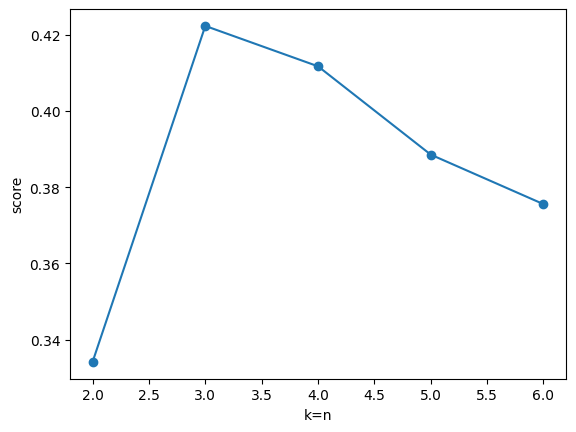

In [99]:
score = []
scores = []
for k in range(2,7):
    kmeans= KMeans(n_clusters=k)
    y_predict= kmeans.fit_predict(df1[['gross income','Rating']])
    score = silhouette_score(df1[['gross income','Rating']],y_predict)
    scores.append(score)
plt.plot(range(2,7),scores,marker='o')
plt.xlabel('k=n')
plt.ylabel('score')
plt.show()

In [100]:
kmeans=KMeans(n_clusters=3)
y_predict=kmeans.fit_predict(df1[['gross income', 'Rating']])
df1['cluster'] =  y_predict

In [101]:
kmeans.cluster_centers_

array([[0.23219885, 0.77664076],
       [0.18608309, 0.27512077],
       [0.67973047, 0.40883333]])

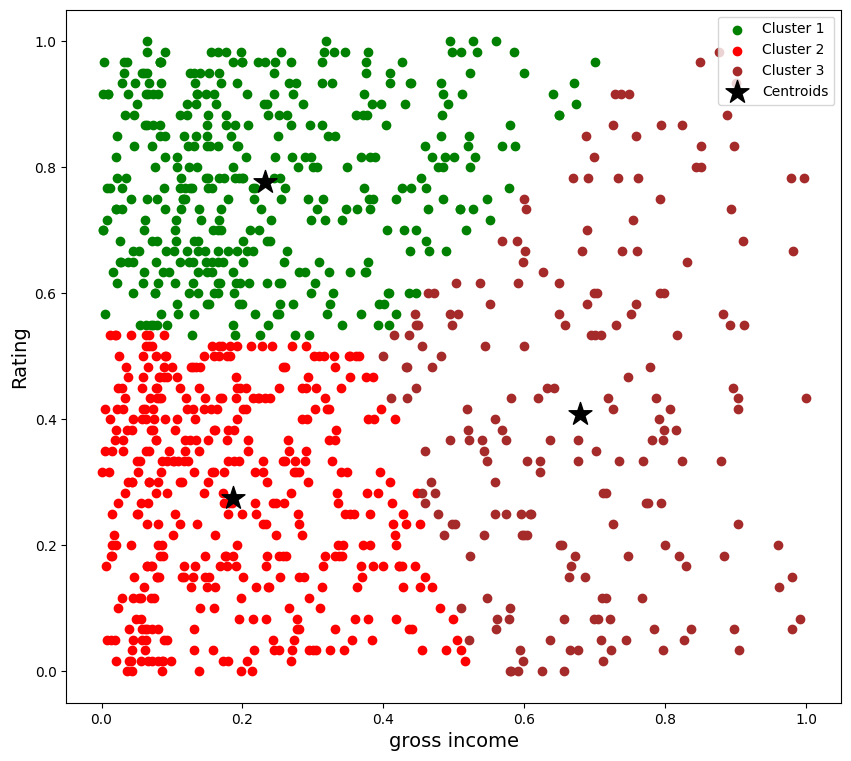

In [102]:
df10 = df1[df1.cluster==0]
df11 = df1[df1.cluster==1]
df12 = df1[df1.cluster==2]
plt.figure(figsize=(10,9))
plt.scatter(df10['gross income'],df10['Rating'],color='green', label='Cluster 1')
plt.scatter(df11['gross income'],df11['Rating'],color='red', label='Cluster 2')
plt.scatter(df12['gross income'],df12['Rating'],color='brown', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker="*",c='black',s=300,label='Centroids')
plt.xlabel("gross income",fontsize=14)
plt.ylabel("Rating",fontsize=14)
plt.legend()
plt.show()


In [109]:
for k in range(2,4):
    kmeans= KMeans(n_clusters=k)
    y_predict= kmeans.fit_predict(df1[['gross income','Rating']])
score= silhouette_score(df1[['gross income','Rating']],y_predict)
print(f"k={k},Silhouette_score:{score}")



k=3,Silhouette_score:0.42202911588733055


Fitting

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.optimize as optimize
from scipy.optimize import curve_fit



In [111]:
df2=pd.read_csv('world_population.csv')
print(df2)

     Rank CCA3  Country/Territory           Capital Continent  \
0      36  AFG        Afghanistan             Kabul      Asia   
1     138  ALB            Albania            Tirana    Europe   
2      34  DZA            Algeria           Algiers    Africa   
3     213  ASM     American Samoa         Pago Pago   Oceania   
4     203  AND            Andorra  Andorra la Vella    Europe   
..    ...  ...                ...               ...       ...   
229   226  WLF  Wallis and Futuna          Mata-Utu   Oceania   
230   172  ESH     Western Sahara          El Aaiún    Africa   
231    46  YEM              Yemen             Sanaa      Asia   
232    63  ZMB             Zambia            Lusaka    Africa   
233    74  ZWE           Zimbabwe            Harare    Africa   

     2022 Population  2020 Population  2015 Population  2010 Population  \
0           41128771         38972230         33753499         28189672   
1            2842321          2866849          2882481          29133

In [112]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [113]:
years = np.array([1970, 1980, 1990, 2000, 2010, 2015, 2020, 2022])
total_population = df2[
    ['1970 Population', '1980 Population', '1990 Population', '2000 Population',
     '2010 Population', '2015 Population', '2020 Population', '2022 Population']
].sum().values

total_population = total_population / 1e9

In [114]:
def exponential(x, a, b):
    return a * np.exp(b * x)

In [115]:
p, cov = curve_fit(exponential, years, total_population, p0=[1, 0.01])
sigma = np.sqrt(np.diag(cov))

a = p[0].item()
b = p[1].item()
sigma_a = sigma[0].item()
sigma_b = sigma[1].item()

print(f"a = {p[0]:g} +/- {sigma[0]:g}")
print(f"b = {p[1]:.4f} +/- {sigma[1]:.4f}")


a = 3.63954e-12 +/- 4.21265e-12
b = 0.0141 +/- 0.0006


In [116]:
future_years = np.arange(1970, 2030)

In [117]:
predicted_population = exponential(future_years, a, b)

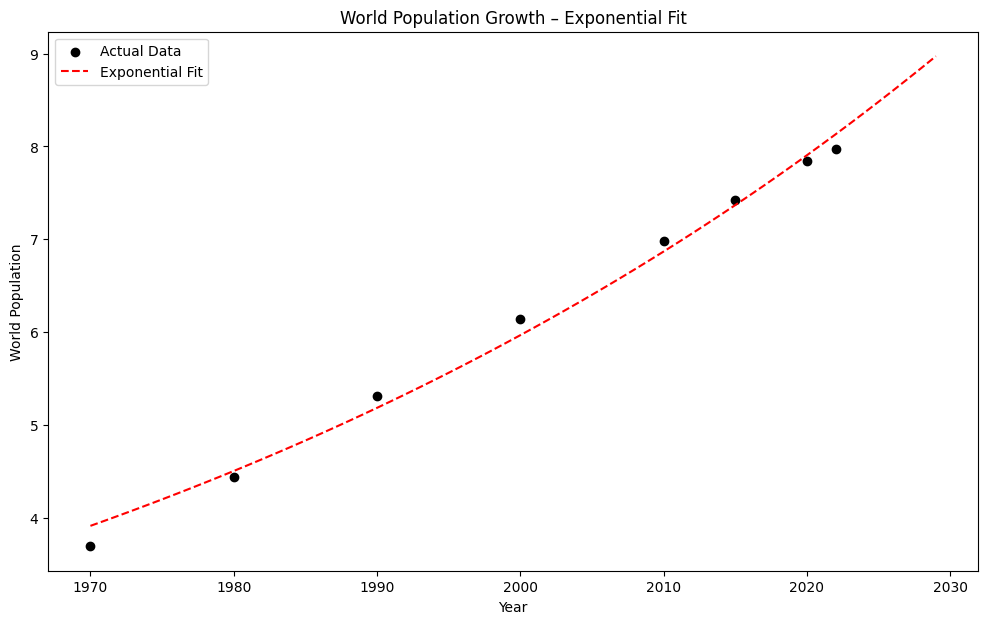

In [118]:
plt.figure(figsize=(12, 7))
plt.scatter(years, total_population, color='black', label='Actual Data')
plt.plot(future_years,predicted_population, 'r--', label='Exponential Fit')
plt.xlabel('Year')
plt.ylabel('World Population')
plt.title('World Population Growth – Exponential Fit')
plt.legend()
plt.show()